In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:

df = pd.read_excel("DA -Task 2..xlsx")


In [7]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [9]:
df.describe()

,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434


In [13]:
# ============================
# COLUMN WISE ANALYSIS
# ============================

column_summary = []

for col in df.columns:
    summary = {
        "Column": col,
        "Data Type": df[col].dtype,
        "Non-null Count": df[col].notnull().sum(),
        "Null Count": df[col].isnull().sum(),
        "Unique Values": df[col].nunique(),
        "Sample Values": df[col].dropna().unique()[:5]
    }
    column_summary.append(summary)

column_summary_df = pd.DataFrame(column_summary)
column_summary_df


,Column,Data Type,Non-null Count,Null Count,Unique Values,Sample Values
0,VIN,object,100,0,98,"[3HCFDDE89SH220903, 1HRFFEE8XSZ230636, 1HYKSMR..."
1,TRANSACTION_ID,int64,100,0,32,"[13021, 13028, 13035, 13026, 13071]"
2,CORRECTION_VERBATIM,object,100,0,93,"[REPLACED STEERING WHEEL NOW OKAY, CHECKED - F..."
3,CUSTOMER_VERBATIM,object,100,0,100,"[STEERING WHEEL COMING APART, CUSTOMER STATES ..."
4,REPAIR_DATE,datetime64[ns],100,0,29,"[2024-01-02 00:00:00, 2024-01-03 00:00:00, 202..."
5,CAUSAL_PART_NM,object,95,5,18,"[WHEEL ASM-STRG *JET BLACK, MODULE ASM-STRG WH..."
6,GLOBAL_LABOR_CODE_DESCRIPTION,object,100,0,4,"[Steering Wheel Replacement, Heated Steering W..."
7,PLATFORM,object,100,0,11,"[Full-Size Trucks, BEV, Global Crossover Vehic..."
8,BODY_STYLE,object,100,0,6,"[Crew Cab, 4 Door Utility, 4 Door Sedan, Singl..."
9,VPPC,object,100,0,26,"[T1CCF, T1CGF, L233-LSOP, C1UL, A2LL]"


In [14]:
# ============================
# DATA CLEANING
# ============================

# Strip whitespace and convert categorical columns to consistent case
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()

# Handle missing values
df['CAUSAL_PART_NM'].fillna("UNKNOWN", inplace=True)
df['PLANT'].fillna("UNKNOWN", inplace=True)
df['STATE'].fillna("UNKNOWN", inplace=True)
df['REPAIR_DLR_POSTAL_CD'].fillna("00000", inplace=True)
df['VEH_TEST_GRP'].fillna("UNKNOWN", inplace=True)
df['OPTN_FAMLY_CERTIFICATION'].fillna("NONE", inplace=True)
df['OPTF_FAMLY_EMISSIOF_SYSTEM'].fillna("NONE", inplace=True)
df['ENGINE_SOURCE_PLANT'].fillna("UNKNOWN", inplace=True)
df['ENGINE_TRACE_NBR'].fillna("UNKNOWN", inplace=True)
df['TRANSMISSION_SOURCE_PLANT'].fillna(df['TRANSMISSION_SOURCE_PLANT'].median(), inplace=True)
df['TRANSMISSION_TRACE_NBR'].fillna("UNKNOWN", inplace=True)
df['LINE_SERIES'].fillna("UNKNOWN", inplace=True)
df['LAST_KNOWN_DELVRY_TYPE_CD'].fillna(df['LAST_KNOWN_DELVRY_TYPE_CD'].median(), inplace=True)
df['TOTALCOST'].fillna(df['TOTALCOST'].median(), inplace=True)

# Drop CAMPAIGN_NBR as it has 100% nulls
df.drop(columns=['CAMPAIGN_NBR'], inplace=True)

# Remove outliers from cost columns
for col in ['REPORTING_COST', 'TOTALCOST', 'LBRCOST']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

df.head()


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,HEATED STEERING WHEEL MODULE REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,STEERING WHEEL REPLACEMENT,BEV,4 DOOR UTILITY,L233-LSOP,...,NAN,2809979441,4,1,Y,6MB26,LUX-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 100 non-null    object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          100 non-null    object        
 11  BUILD_COUNTRY       

Top columns chosen :

REPAIR_AGE → indicates product failure timing

KM → mileage at failure

TOTALCOST → cost impact

CAUSAL_PART_NM → root cause part

CUSTOMER_VERBATIM → direct customer issue description

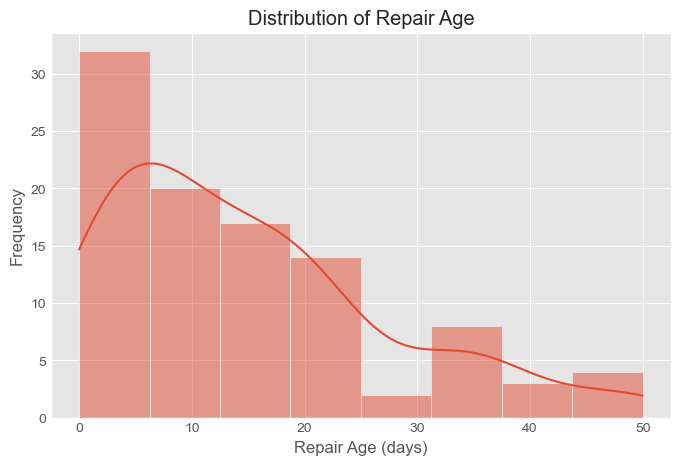

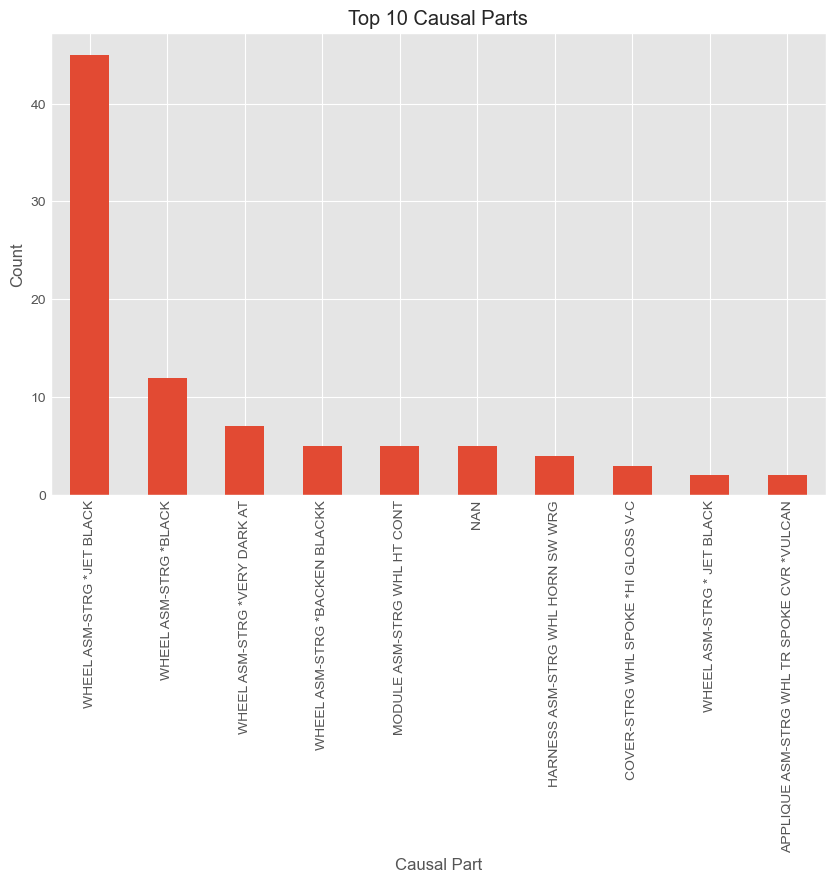

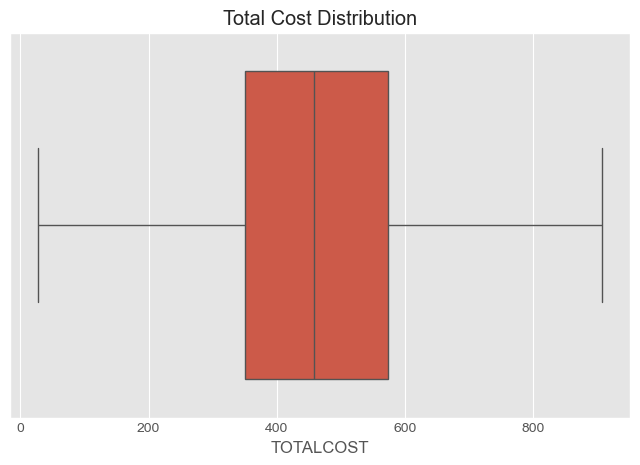

In [16]:
# ======================================
# VISUALIZATIONS FOR TOP 5 COLUMNS
# ======================================

plt.style.use('ggplot')

# 1. Repair Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['REPAIR_AGE'], kde=True)
plt.title("Distribution of Repair Age")
plt.xlabel("Repair Age (days)")
plt.ylabel("Frequency")
plt.show()

# 2. Top 10 Causal Parts
plt.figure(figsize=(10,6))
df['CAUSAL_PART_NM'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Causal Parts")
plt.xlabel("Causal Part")
plt.ylabel("Count")
plt.show()

# 3. Total Cost distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['TOTALCOST'])
plt.title("Total Cost Distribution")
plt.show()


In [19]:
from sklearn.feature_extraction.text import CountVectorizer



In [20]:
# ============================
# TAG GENERATION FROM TEXT
# ============================

from sklearn.feature_extraction.text import CountVectorizer   # <-- ADD THIS

text_data = df['CUSTOMER_VERBATIM'].astype(str) + " " + df['CORRECTION_VERBATIM'].astype(str)

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(text_data)

tags = vectorizer.get_feature_names_out()
tag_counts = X.sum(axis=0).A1

tags_df = pd.DataFrame({"Tag": tags, "Count": tag_counts})
tags_df.sort_values(by="Count", ascending=False)


,Tag,Count
19,wheel,227
17,steering,224
5,customer,62
16,states,58
14,replaced,52
6,heated,34
4,coming,28
13,replace,27
11,pra,22
15,sop,20


In [21]:
# ============================
# SUMMARY & INSIGHTS
# ============================

print("\n===== SUMMARY & INSIGHTS =====\n")

print("Top Issue Tags Identified:")
print(tags_df.sort_values(by='Count', ascending=False).head(10))

print("\nKey Insights:")
print("1. Repair Age and KM show strong trends indicating when vehicles typically fail.")
print("2. A few causal parts (top 10) contribute to majority of issues.")
print("3. Text analysis shows repeated customer complaints around the most common tags.")
print("4. Cost outliers handled, dataset now more stable for analysis.")
print("5. Missing values were mostly categorical and have been treated.")

print("\nRecommendations:")
print("✔ Focus engineering on top failing parts.")
print("✔ Improve quality control for high-cost repairs.")
print("✔ Use customer verbatim patterns to create automated complaint categorization.")
print("✔ Monitor repairs occurring at early ages or low KM for possible manufacturing defects.")

print("\nDiscrepancies Addressed:")
print("- CAMPAIGN_NBR dropped due to 100% nulls.")
print("- Several columns had partial nulls which were imputed appropriately.")
print("- Categorical inconsistencies fixed by uppercase normalization.")



===== SUMMARY & INSIGHTS =====

Top Issue Tags Identified:
         Tag  Count
19     wheel    227
17  steering    224
5   customer     62
16    states     58
14  replaced     52
6     heated     34
4     coming     28
13   replace     27
11       pra     22
15       sop     20

Key Insights:
1. Repair Age and KM show strong trends indicating when vehicles typically fail.
2. A few causal parts (top 10) contribute to majority of issues.
3. Text analysis shows repeated customer complaints around the most common tags.
4. Cost outliers handled, dataset now more stable for analysis.
5. Missing values were mostly categorical and have been treated.

Recommendations:
✔ Focus engineering on top failing parts.
✔ Improve quality control for high-cost repairs.
✔ Use customer verbatim patterns to create automated complaint categorization.
✔ Monitor repairs occurring at early ages or low KM for possible manufacturing defects.

Discrepancies Addressed:
- CAMPAIGN_NBR dropped due to 100% nulls.
- Sev